In [1]:
import json
dat = json.load(open("temp-lod.json", "r"))
dat.keys()

dict_keys(['Xavg', 'Yavg', 'Zavg', 'cl', 'cd', 'cs', 'cx', 'cy', 'cz', 'cx*c/cref', 'cy*c/cref', 'cz*c/cref', 'cmx', 'cmy', 'cmz', 'cmx*c/cref', 'cmy*c/cref', 'cmz*c/cref'])

In [2]:
def cross(a, b, c, x, y, z):
    return (b*z - c*y, -(a*z - c*x), a*y - b*x)

def Crz(fx, fy, fz, mx, my, mz, zavg):
    # If r is the position of the force that generates the torque
    # then we need to find r = a*F + F x m where r_z = zavg
    # Subtituting w = r x F = (F x m) x F = (F.F)m - (F.m)F
    fsq = fx*fx + fy*fy + fz*fz
    cx, cy, cz = cross(fx, fy, fz, mx, my, mz)
    cx, cy, cz = cx/fsq, cy/fsq, cz/fsq
    a = (cz - zavg)/fz
    return cx - a*fx, cy - a*fy

In [25]:
from CODE.basicgeo import P2, P3
fx, fy, fz, mx, my, mz, zavg = 1,2,3,4,5,6,10
v1 = P3(fx, fy, fz)
v2 = P3(mx, my, mz)
P3.Cross(pt1,pt2)
Crz(fx, fy, fz, mx, my, mz, zavg),Crzee(v1,v2,zavg)

((3.1904761904761902, 7.238095238095238),
 P2(3.1904761904761902, 7.238095238095238))

In [15]:
pt1.z

3.0

In [20]:
def Crzee(f,m,zavg):
    # If r is the position of the force that generates the torque
    # then we need to find r = a*F + F x m where r_z = zavg
    # Subtituting w = r x F = (F x m) x F = (F.F)m - (F.m)F
    fsq = f.Lensq()
    cx, cy, cz = P3.Cross(f, m)
    cx, cy, cz = cx/fsq, cy/fsq, cz/fsq
    a = (cz - zavg)/f.z
    return P2(cx - a*fx, cy - a*fy)


In [26]:
Lfx, Lfy, Lfz = dat["cx"], dat["cy"], dat["cz"]
Lmx, Lmy, Lmz = dat["cmx"], dat["cmy"], dat["cmz"]
LZavg = dat["Zavg"]
sx, sy = [ ], [ ]
sx1, sy1 = [], []
for fx, fy, fz, mx, my, mz, zavg in zip(Lfx, Lfy, Lfz, Lmx, Lmy, Lmz, LZavg):
    x, y = Crz(fx, fy, fz, mx, my, mz, zavg)
    pos = Crzee(P3(fx, fy, fz),P3(mx, my, mz),zavg)
    sx.append(x)
    sy.append(y)
    sx1.append(pos.u)
    sy1.append(pos.v)
    

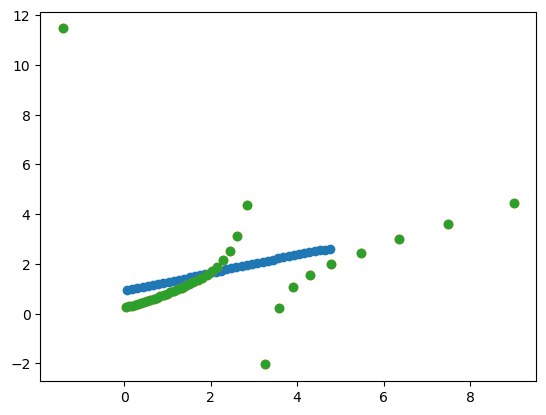

In [27]:
from matplotlib import pyplot as plt
plt.scatter(dat["Yavg"], dat["Xavg"])
plt.scatter(sy, sx)
plt.scatter(sy1, sx1)


In [5]:
Lfx, Lfy, Lfz = dat["cx"], dat["cy"], dat["cz"]
Lmx, Lmy, Lmz = dat["cmx*c/cref"], dat["cmy*c/cref"], dat["cmz*c/cref"]
LZavg = dat["Zavg"]
csx, csy = [ ], [ ]
for fx, fy, fz, mx, my, mz, zavg in zip(Lfx, Lfy, Lfz, Lmx, Lmy, Lmz, LZavg):
    x, y = Crz(fx, fy, fz, mx, my, mz, zavg)
    csx.append(x)
    csy.append(y)


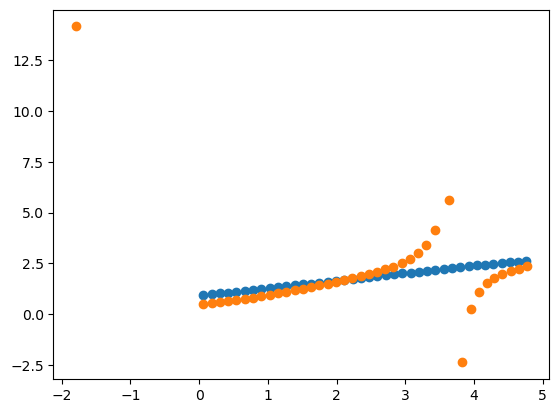

In [6]:
from matplotlib import pyplot as plt
plt.scatter(dat["Yavg"], dat["Xavg"])
#plt.scatter(sy, sx)
plt.scatter(csy, csx)


In [7]:
cs = []
for x , y in zip(csx, csy):
    cs.append((x,y))

In [19]:
cs

[(0.4959417041722888, 0.06026404452834462),
 (0.5311170278497334, 0.18060479471600221),
 (0.5766321117117886, 0.30113839548691723),
 (0.6300431180645044, 0.4216804061574316),
 (0.6872735144328588, 0.5423593990251272),
 (0.7502431374779832, 0.663556590281838),
 (0.815726731887817, 0.78438631327759),
 (0.8863048704550215, 0.9050594726756894),
 (0.9563051590607659, 1.0257964959663808),
 (1.0316753863374475, 1.1464093854880466),
 (1.105509582864612, 1.2677443946829854),
 (1.1828822720855552, 1.388277673233441),
 (1.2594735392627485, 1.5087599084208099),
 (1.34049040991445, 1.629178430295399),
 (1.4211473927325327, 1.749562054416624),
 (1.5054457211698375, 1.869923671691741),
 (1.589432661972758, 1.9900632273580843),
 (1.6786197127350737, 2.110210769431974),
 (1.7700777617760084, 2.230233379481607),
 (1.8677274046923606, 2.350153718987901),
 (1.9679650314441937, 2.469605530323083),
 (2.0767401704983, 2.589243171219384),
 (2.198666149935978, 2.7083705905016124),
 (2.3406566459961105, 2.82744